<a href="https://colab.research.google.com/github/themachineheadbr/study_group_ds_ai/blob/main/week_1/challenge_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Lei de Benford**

A lei de Benford, também chamada de lei do primeiro dígito, lei de Newcomb-Benford e lei números anômalos refere-se à distribuição de dígitos em várias fontes de casos reais. Ao contrário da homogeneidade esperada, a lei afirma que em muitas coleções de números que ocorrem naturalmente, o primeiro dígito significativo provavelmente será pequeno. Sem homogeneidade, esta distribuição mostra que o dígito 1 tem 30% de chance de aparecer em um conjunto de dados estatísticos enquanto valores maiores tem menos possibilidade de aparecer.

Frank Benford demonstrou que esse resultado se aplica a uma ampla variedade de conjuntos de dados, incluindo contas de eletricidade, endereços, preços de ações, preços de casas, números de população, taxas de mortalidade, comprimentos de rios, constantes físicas e matemáticas. pelas leis de potência (que são muito comuns na natureza). Todas essas afirmações são calculadas ou definidas junto a uma escala logarítmica.

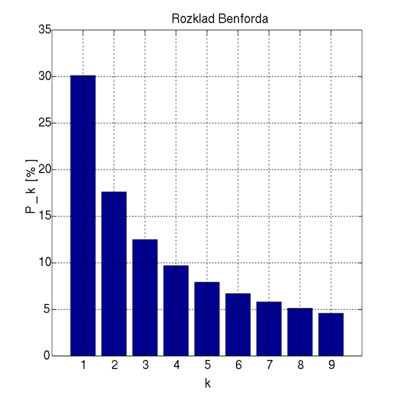

Origem: Wikipédia, a enciclopédia livre.

Link: https://pt.wikipedia.org/wiki/Lei_de_Benford

## **Desafio #1**

Utilizando a biblioteca NumPy, baixe e leia o arquivo [**cities.csv**](https://drive.google.com/file/d/1OK7bF-nep68LGbnmpK2s1T_JNAa2VrPg/view) com o número da população de cada município Brasileiro e verifique se o conjunto de dados segue a Lei de Benford, gerando um gráfico como no exemplo **#Plotting** com o percentual da frequência de cada número no conjunto de dados. 



## **#Plotting**

In [63]:
import matplotlib.pyplot as plt
# %matplotlib inline

# data = {'1': 30.1, '2': 17.6, '3': 12.5, '4': 9.7, '5': 7.9, '6': 6.7, '7': 5.8, '8': 5.1, '9': 4.6}
# names = list(data.keys())
# values = list(data.values())

# fig, axs = plt.subplots()
# axs.bar(names, values)

# fig.suptitle('Rozkland Benford')


In [64]:
import pandas as pd
import numpy as np

In [65]:
data_csv_link = 'https://raw.githubusercontent.com/themachineheadbr/study_group_ds_ai/main/week_1/data/cities.csv'


In [66]:
df = pd.read_csv(data_csv_link)

In [67]:
df.head()

,Populacao
0,24392
1,90353
2,6313
3,78574
4,17029


In [68]:
df.describe()

,Populacao
count,5.565000e+03
mean,3.427777e+04
std,2.031126e+05
min,8.050000e+02
25%,5.235000e+03
50%,1.093400e+04
75%,2.342400e+04
max,1.125350e+07


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Populacao  5565 non-null   int64
dtypes: int64(1)
memory usage: 43.6 KB


In [70]:
df.dtypes

Populacao    int64
dtype: object

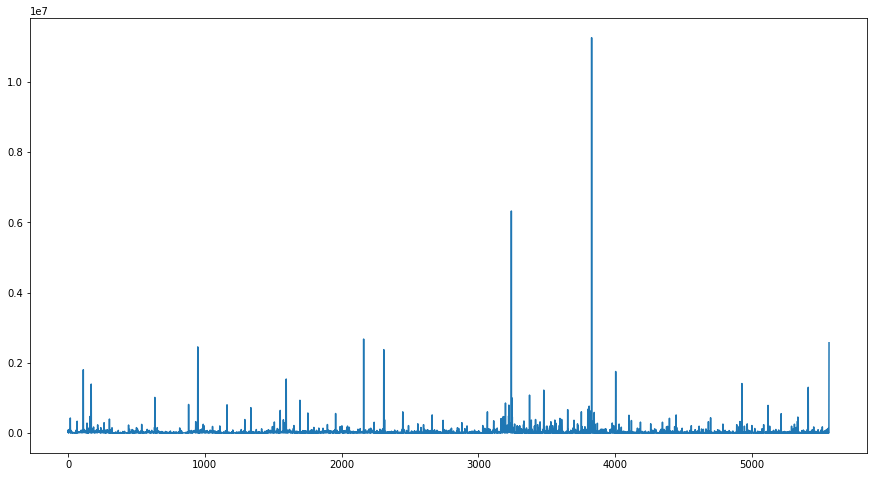

In [71]:
plt.figure(figsize=(15,8))
plt.plot(df)

In [72]:
sum = {
    '1': 0,
    '2': 0,
    '3': 0,
    '4': 0,
    '5': 0,
    '6': 0,
    '7': 0,
    '8': 0,
    '9': 0
}

for entry in df['Populacao']:
  first_digit = str(entry)[0]
  sum[first_digit]+= 1
  

In [73]:
sum

{'1': 1676,
 '2': 1025,
 '3': 739,
 '4': 562,
 '5': 440,
 '6': 392,
 '7': 316,
 '8': 265,
 '9': 150}

In [74]:
total_values = df['Populacao'].size
percentages = pd.DataFrame(list(sum.items()),columns=['Number', 'Freq'])
percentages['Percentage'] = (percentages['Freq'] / percentages['Freq'].sum()) * 100

In [75]:
percentages

,Number,Freq,Percentage
0,1,1676,30.116801
1,2,1025,18.418688
2,3,739,13.279425
3,4,562,10.098832
4,5,440,7.906559
5,6,392,7.044025
6,7,316,5.678347
7,8,265,4.761905
8,9,150,2.695418


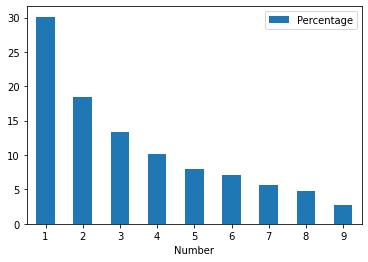

In [86]:
ax = percentages.plot.bar(x='Number', y='Percentage', rot=0)